In [117]:
%time
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as sk
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, DBSCAN
from scipy.stats import zscore
import scipy.cluster.hierarchy as ch
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import LabelEncoder
pd.options.display.max_columns = None

CPU times: user 5 μs, sys: 1e+03 ns, total: 6 μs
Wall time: 8.58 μs


In [118]:
df = pd.read_csv("../data_cleaned/cleaned_dataset_no_zeros.csv")
df.head(20)

,Species,Country.of.Origin,Variety,Processing.Method,Aroma,Flavor,Aftertaste,Acidity,Body,Balance,Uniformity,Clean.Cup,Sweetness,Cupper.Points,Total.Cup.Points,Moisture,Category.One.Defects,Quakers,Color,Category.Two.Defects,altitude_mean_meters
0,Arabica,Ethiopia,Caturra,Washed / Wet,8.67,8.83,8.67,8.75,8.50,8.42,10.00,10.0,10.00,8.75,90.58,0.12,0,0.0,Green,0,2075.0
1,Arabica,Ethiopia,Other,Washed / Wet,8.75,8.67,8.50,8.58,8.42,8.42,10.00,10.0,10.00,8.58,89.92,0.12,0,0.0,Green,1,2075.0
2,Arabica,Guatemala,Bourbon,Washed / Wet,8.42,8.50,8.42,8.42,8.33,8.42,10.00,10.0,10.00,9.25,89.75,0.11,0,0.0,Green,0,1700.0
3,Arabica,Ethiopia,Caturra,Natural / Dry,8.17,8.58,8.42,8.42,8.50,8.25,10.00,10.0,10.00,8.67,89.00,0.11,0,0.0,Green,2,2000.0
4,Arabica,Ethiopia,Other,Washed / Wet,8.25,8.50,8.25,8.50,8.42,8.33,10.00,10.0,10.00,8.58,88.83,0.12,0,0.0,Green,2,2075.0
5,Arabica,Ethiopia,Caturra,Washed / Wet,8.25,8.33,8.50,8.42,8.33,8.50,10.00,10.0,9.33,9.00,88.67,0.03,0,0.0,Green,0,1635.0
6,Arabica,Ethiopia,Caturra,Washed / Wet,8.67,8.67,8.58,8.42,8.33,8.42,9.33,10.0,9.33,8.67,88.42,0.03,0,0.0,Green,0,1635.0
7,Arabica,Ethiopia,Other,Natural / Dry,8.08,8.58,8.50,8.50,7.67,8.42,10.00,10.0,10.00,8.50,88.25,0.10,0,0.0,Green,4,1822.5
8,Arabica,Ethiopia,Caturra,Natural / Dry,8.17,8.67,8.25,8.50,7.75,8.17,10.00,10.0,10.00,8.58,88.08,0.10,0,0.0,Green,1,1905.0
9,Arabica,United States,Other,Washed / Wet,8.25,8.42,8.17,8.33,8.08,8.17,10.00,10.0,10.00,8.50,87.92,0.11,0,0.0,Green,0,1872.0


In [119]:
df.columns

Index(['Species', 'Country.of.Origin', 'Variety', 'Processing.Method', 'Aroma',
       'Flavor', 'Aftertaste', 'Acidity', 'Body', 'Balance', 'Uniformity',
       'Clean.Cup', 'Sweetness', 'Cupper.Points', 'Total.Cup.Points',
       'Moisture', 'Category.One.Defects', 'Quakers', 'Color',
       'Category.Two.Defects', 'altitude_mean_meters'],
      dtype='object')

In [120]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1103 entries, 0 to 1102
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Species               1103 non-null   object 
 1   Country.of.Origin     1103 non-null   object 
 2   Variety               1103 non-null   object 
 3   Processing.Method     1103 non-null   object 
 4   Aroma                 1103 non-null   float64
 5   Flavor                1103 non-null   float64
 6   Aftertaste            1103 non-null   float64
 7   Acidity               1103 non-null   float64
 8   Body                  1103 non-null   float64
 9   Balance               1103 non-null   float64
 10  Uniformity            1103 non-null   float64
 11  Clean.Cup             1103 non-null   float64
 12  Sweetness             1103 non-null   float64
 13  Cupper.Points         1103 non-null   float64
 14  Total.Cup.Points      1103 non-null   float64
 15  Moisture             

In [121]:
df.isna().sum()

Species                 0
Country.of.Origin       0
Variety                 0
Processing.Method       0
Aroma                   0
Flavor                  0
Aftertaste              0
Acidity                 0
Body                    0
Balance                 0
Uniformity              0
Clean.Cup               0
Sweetness               0
Cupper.Points           0
Total.Cup.Points        0
Moisture                0
Category.One.Defects    0
Quakers                 0
Color                   0
Category.Two.Defects    0
altitude_mean_meters    0
dtype: int64

In [122]:
df.describe()

,Aroma,Flavor,Aftertaste,Acidity,Body,Balance,Uniformity,Clean.Cup,Sweetness,Cupper.Points,Total.Cup.Points,Moisture,Category.One.Defects,Quakers,Category.Two.Defects,altitude_mean_meters
count,1103.000000,1103.000000,1103.000000,1103.000000,1103.000000,1103.000000,1103.000000,1103.000000,1103.000000,1103.000000,1103.000000,1103.000000,1103.000000,1103.000000,1103.000000,1103.000000
mean,7.578368,7.527824,7.401496,7.535739,7.513654,7.512665,9.876827,9.869365,9.882738,7.496047,82.185893,0.110879,0.368994,0.135993,3.531278,1327.317203
std,0.309181,0.331268,0.340065,0.313192,0.289467,0.354021,0.429254,0.662942,0.523704,0.413674,2.629645,0.017823,1.853241,0.716414,5.269219,486.627223
min,5.080000,6.170000,6.170000,5.250000,5.170000,5.250000,6.000000,1.330000,1.330000,5.170000,59.830000,0.010000,0.000000,0.000000,0.000000,1.000000
25%,7.420000,7.330000,7.250000,7.330000,7.330000,7.330000,10.000000,10.000000,10.000000,7.250000,81.210000,0.110000,0.000000,0.000000,0.000000,1100.000000
50%,7.580000,7.580000,7.420000,7.500000,7.500000,7.500000,10.000000,10.000000,10.000000,7.500000,82.500000,0.110000,0.000000,0.000000,2.000000,1310.640000
75%,7.750000,7.750000,7.580000,7.750000,7.670000,7.750000,10.000000,10.000000,10.000000,7.750000,83.580000,0.120000,0.000000,0.000000,4.000000,1600.000000
max,8.750000,8.830000,8.670000,8.750000,8.580000,8.750000,10.000000,10.000000,10.000000,10.000000,90.580000,0.200000,31.000000,11.000000,47.000000,4287.000000


<Axes: >

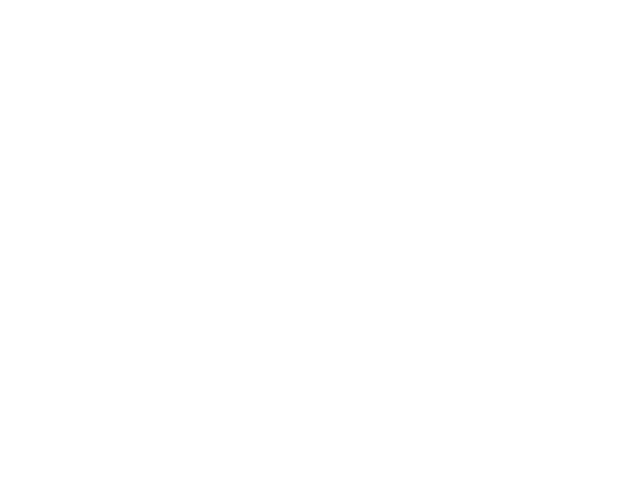

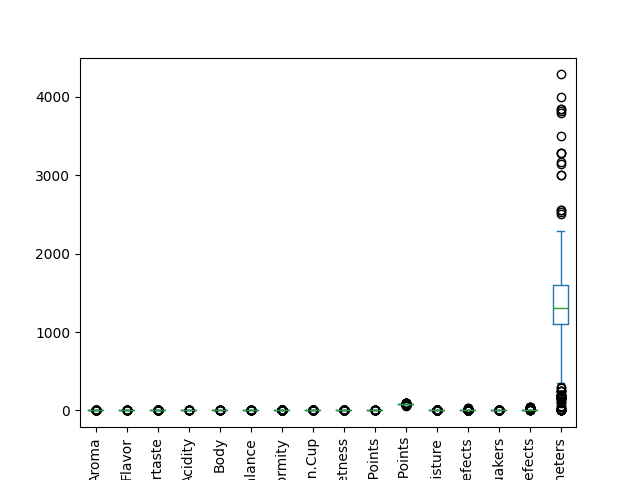

In [123]:
fig = plt.figure()
df.plot.box(rot=90)

In [124]:
df['altitude_mean_meters'].plot.box()

<Axes: >

<Axes: ylabel='Frequency'>

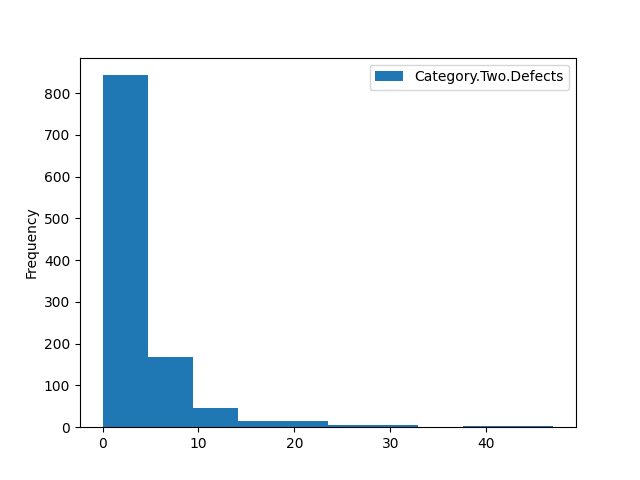

In [125]:
df[['Category.Two.Defects']].plot.hist()

<Axes: ylabel='Frequency'>

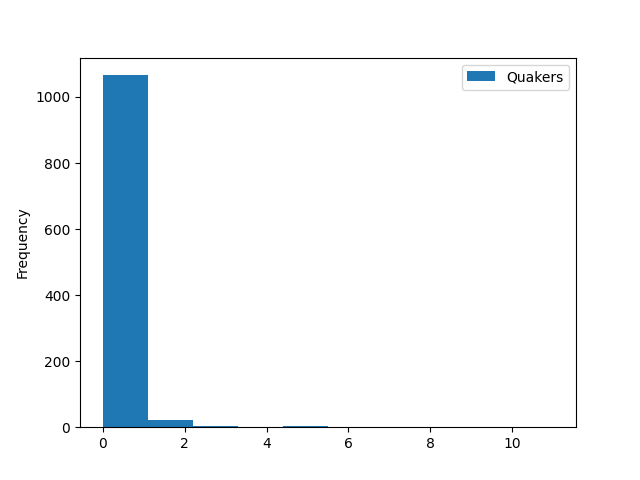

In [126]:
# we're gonna keep these outlying values, as they might have a high impact on the quality score
df[['Quakers']].plot.hist()

## Data Exploration

In [127]:
# lets see which countries can boast the highest cup grades
df.groupby('Country.of.Origin')['Total.Cup.Points'].mean().reset_index().sort_values(by='Total.Cup.Points', ascending=False)

,Country.of.Origin,Total.Cup.Points
32,United States (Hawaii),86.960000
8,Ethiopia,85.916333
23,Papua New Guinea,85.750000
14,Japan,84.670000
31,United States,84.433000
15,Kenya,84.271304
22,Panama,83.707500
30,Uganda,83.382941
3,Colombia,83.224832
7,El Salvador,83.115263


Seems like a mixed bag from around the world. There seems to bare a small majority of african countries in the top half, an Hawaiian coffee seems to be a specialty!


In [128]:
df.groupby('Country.of.Origin').size().sort_values(ascending=False).plot.bar(ylabel='Count')

<Axes: xlabel='Country.of.Origin', ylabel='Count'>

Though we see that there is a very skewed representation of countries in the dataset. Over a third of the coffee in the dataset is from Mexico!

In [129]:
df.groupby('Country.of.Origin')['Total.Cup.Points'].median().reset_index().sort_values(by='Total.Cup.Points', ascending=False)

,Country.of.Origin,Total.Cup.Points
32,United States (Hawaii),86.960
31,United States,86.625
23,Papua New Guinea,85.750
8,Ethiopia,85.250
14,Japan,84.670
15,Kenya,84.580
22,Panama,84.125
3,Colombia,83.250
2,China,83.170
4,Costa Rica,83.165


Taking the median values, it seems aobut the same

<Axes: xlabel='Species'>

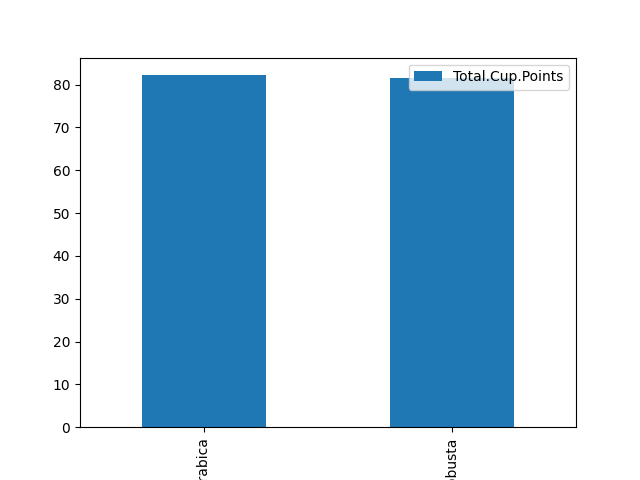

In [130]:
df.groupby('Species')['Total.Cup.Points'].mean().reset_index().sort_values(by='Total.Cup.Points', ascending=False).plot.bar(x='Species')

Surprinsingly, The Robusta species does not seem to have a much lower average score than Arabica, which we thought were far superior in taste

In [131]:
corr_mat = df.corr(numeric_only=True)
corr_mat

,Aroma,Flavor,Aftertaste,Acidity,Body,Balance,Uniformity,Clean.Cup,Sweetness,Cupper.Points,Total.Cup.Points,Moisture,Category.One.Defects,Quakers,Category.Two.Defects,altitude_mean_meters
Aroma,1.000000,0.743109,0.688130,0.606707,0.558217,0.602133,0.126962,0.196811,0.008310,0.611088,0.688725,-0.131316,-0.104645,0.007763,-0.184304,0.155328
Flavor,0.743109,1.000000,0.849983,0.757027,0.668397,0.722149,0.207079,0.297936,0.077417,0.764423,0.836167,-0.189600,-0.069596,0.009010,-0.233813,0.148021
Aftertaste,0.688130,0.849983,1.000000,0.705410,0.666111,0.737439,0.226183,0.288698,0.063372,0.761057,0.827814,-0.178685,-0.103180,0.007843,-0.263210,0.133273
Acidity,0.606707,0.757027,0.705410,1.000000,0.604118,0.624788,0.178229,0.176823,0.022285,0.642121,0.708001,-0.151101,-0.090468,-0.017353,-0.181162,0.181499
Body,0.558217,0.668397,0.666111,0.604118,1.000000,0.715045,0.116480,0.140021,0.002498,0.590999,0.665436,-0.171327,-0.035044,-0.002792,-0.138092,0.142243
Balance,0.602133,0.722149,0.737439,0.624788,0.715045,1.000000,0.215432,0.254276,0.083593,0.679213,0.775314,-0.227089,-0.079425,0.001002,-0.218804,0.144477
Uniformity,0.126962,0.207079,0.226183,0.178229,0.116480,0.215432,1.000000,0.407165,0.267139,0.193130,0.482474,-0.050591,-0.138970,0.050565,-0.106582,0.050228
Clean.Cup,0.196811,0.297936,0.288698,0.176823,0.140021,0.254276,0.407165,1.000000,0.357954,0.278692,0.602087,-0.025067,-0.155839,0.034879,-0.212196,0.047344
Sweetness,0.008310,0.077417,0.063372,0.022285,0.002498,0.083593,0.267139,0.357954,1.000000,0.040933,0.371806,0.012507,-0.010906,0.039301,0.003764,0.002397
Cupper.Points,0.611088,0.764423,0.761057,0.642121,0.590999,0.679213,0.193130,0.278692,0.040933,1.000000,0.772878,-0.175348,-0.061576,0.007878,-0.214129,0.111897


<Axes: >

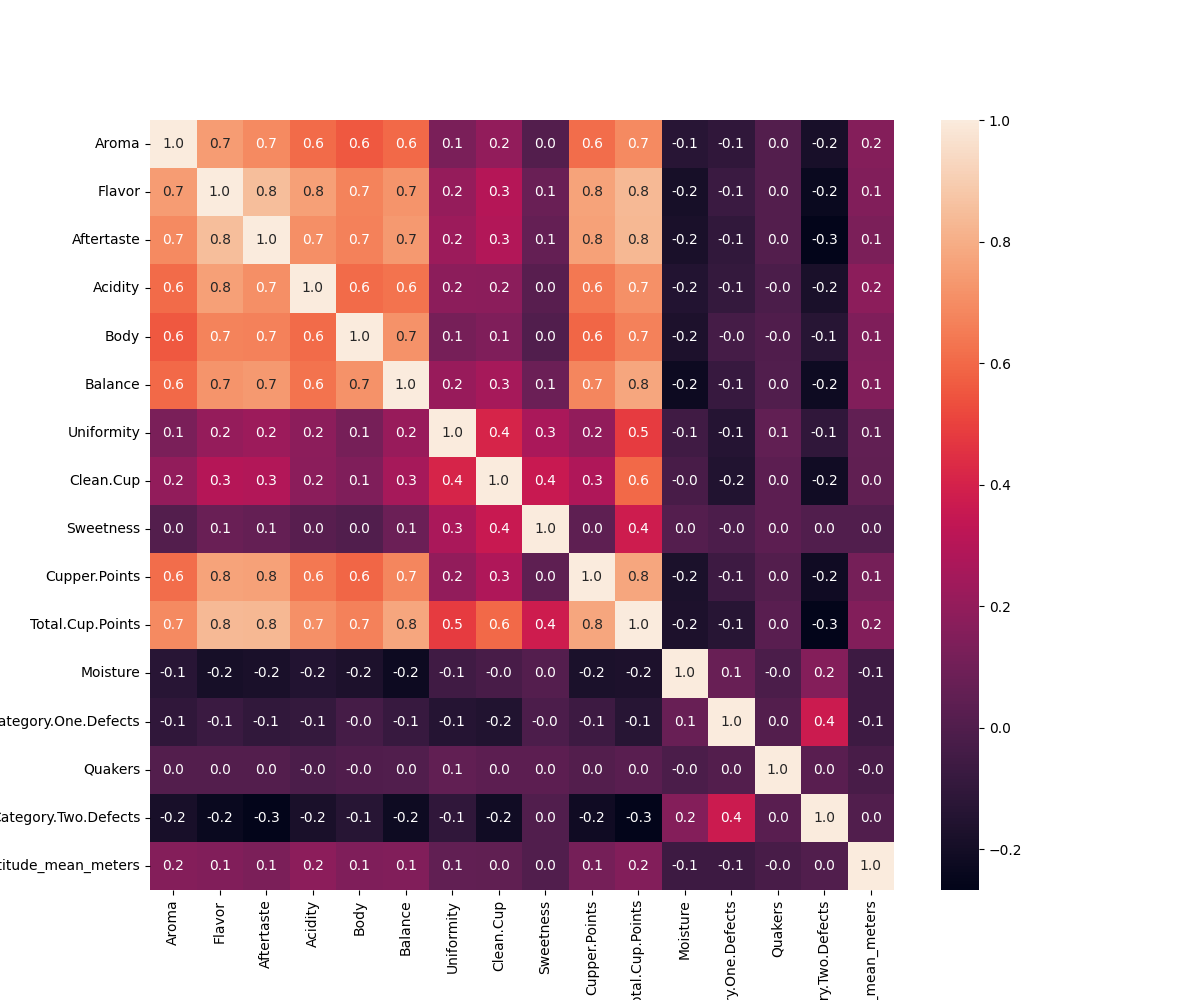

In [132]:
plt.figure(figsize=(12, 10))
sns.heatmap(corr_mat, annot = True, fmt = ".1f")

Unsurprisingly the different flavor parameters seems to correlate a lot with the Total Cup Points, and with each other. It seems that the main parameters that drags down the score is the amount of Category One and Two Defects, which we also suspected. Quakers doesn't seem to have a big impact on the overall Cup Point score. This might, of course,  be biased by the low amount of values above zero

In [133]:
df.dtypes

Species                  object
Country.of.Origin        object
Variety                  object
Processing.Method        object
Aroma                   float64
Flavor                  float64
Aftertaste              float64
Acidity                 float64
Body                    float64
Balance                 float64
Uniformity              float64
Clean.Cup               float64
Sweetness               float64
Cupper.Points           float64
Total.Cup.Points        float64
Moisture                float64
Category.One.Defects      int64
Quakers                 float64
Color                    object
Category.Two.Defects      int64
altitude_mean_meters    float64
dtype: object

Lets label encode the categorical data, so we can see the nominal data affects the correlation score as well

In [134]:
le = LabelEncoder()
cols_to_enc = df.select_dtypes(include='object').columns
enc_df = df.copy()

for col in cols_to_enc:
    enc_df[col] = le.fit_transform(df[col]).astype(int)

enc_df


,Species,Country.of.Origin,Variety,Processing.Method,Aroma,Flavor,Aftertaste,Acidity,Body,Balance,Uniformity,Clean.Cup,Sweetness,Cupper.Points,Total.Cup.Points,Moisture,Category.One.Defects,Quakers,Color,Category.Two.Defects,altitude_mean_meters
0,0,8,5,4,8.67,8.83,8.67,8.75,8.50,8.42,10.00,10.00,10.00,8.75,90.58,0.12,0,0.0,2,0,2075.0
1,0,8,13,4,8.75,8.67,8.50,8.58,8.42,8.42,10.00,10.00,10.00,8.58,89.92,0.12,0,0.0,2,1,2075.0
2,0,9,2,4,8.42,8.50,8.42,8.42,8.33,8.42,10.00,10.00,10.00,9.25,89.75,0.11,0,0.0,2,0,1700.0
3,0,8,5,0,8.17,8.58,8.42,8.42,8.50,8.25,10.00,10.00,10.00,8.67,89.00,0.11,0,0.0,2,2,2000.0
4,0,8,13,4,8.25,8.50,8.25,8.50,8.42,8.33,10.00,10.00,10.00,8.58,88.83,0.12,0,0.0,2,2,2075.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1098,1,12,5,4,7.67,7.67,7.50,7.33,7.58,7.50,10.00,10.00,7.42,7.50,80.17,0.11,0,0.0,1,1,750.0
1099,1,12,5,0,7.58,7.42,7.42,7.83,7.42,7.50,10.00,10.00,7.42,7.58,80.17,0.11,0,0.0,2,0,750.0
1100,1,31,0,0,7.92,7.50,7.42,7.42,7.42,7.42,9.33,10.00,7.58,7.33,79.33,0.11,0,0.0,2,0,3000.0
1101,1,6,5,4,7.50,7.67,7.75,7.75,5.17,5.25,10.00,10.00,8.42,8.58,78.08,0.11,0,0.0,0,0,40.0


In [135]:
# lets see how much variance it give us
df.describe()

,Aroma,Flavor,Aftertaste,Acidity,Body,Balance,Uniformity,Clean.Cup,Sweetness,Cupper.Points,Total.Cup.Points,Moisture,Category.One.Defects,Quakers,Category.Two.Defects,altitude_mean_meters
count,1103.000000,1103.000000,1103.000000,1103.000000,1103.000000,1103.000000,1103.000000,1103.000000,1103.000000,1103.000000,1103.000000,1103.000000,1103.000000,1103.000000,1103.000000,1103.000000
mean,7.578368,7.527824,7.401496,7.535739,7.513654,7.512665,9.876827,9.869365,9.882738,7.496047,82.185893,0.110879,0.368994,0.135993,3.531278,1327.317203
std,0.309181,0.331268,0.340065,0.313192,0.289467,0.354021,0.429254,0.662942,0.523704,0.413674,2.629645,0.017823,1.853241,0.716414,5.269219,486.627223
min,5.080000,6.170000,6.170000,5.250000,5.170000,5.250000,6.000000,1.330000,1.330000,5.170000,59.830000,0.010000,0.000000,0.000000,0.000000,1.000000
25%,7.420000,7.330000,7.250000,7.330000,7.330000,7.330000,10.000000,10.000000,10.000000,7.250000,81.210000,0.110000,0.000000,0.000000,0.000000,1100.000000
50%,7.580000,7.580000,7.420000,7.500000,7.500000,7.500000,10.000000,10.000000,10.000000,7.500000,82.500000,0.110000,0.000000,0.000000,2.000000,1310.640000
75%,7.750000,7.750000,7.580000,7.750000,7.670000,7.750000,10.000000,10.000000,10.000000,7.750000,83.580000,0.120000,0.000000,0.000000,4.000000,1600.000000
max,8.750000,8.830000,8.670000,8.750000,8.580000,8.750000,10.000000,10.000000,10.000000,10.000000,90.580000,0.200000,31.000000,11.000000,47.000000,4287.000000


<Axes: >

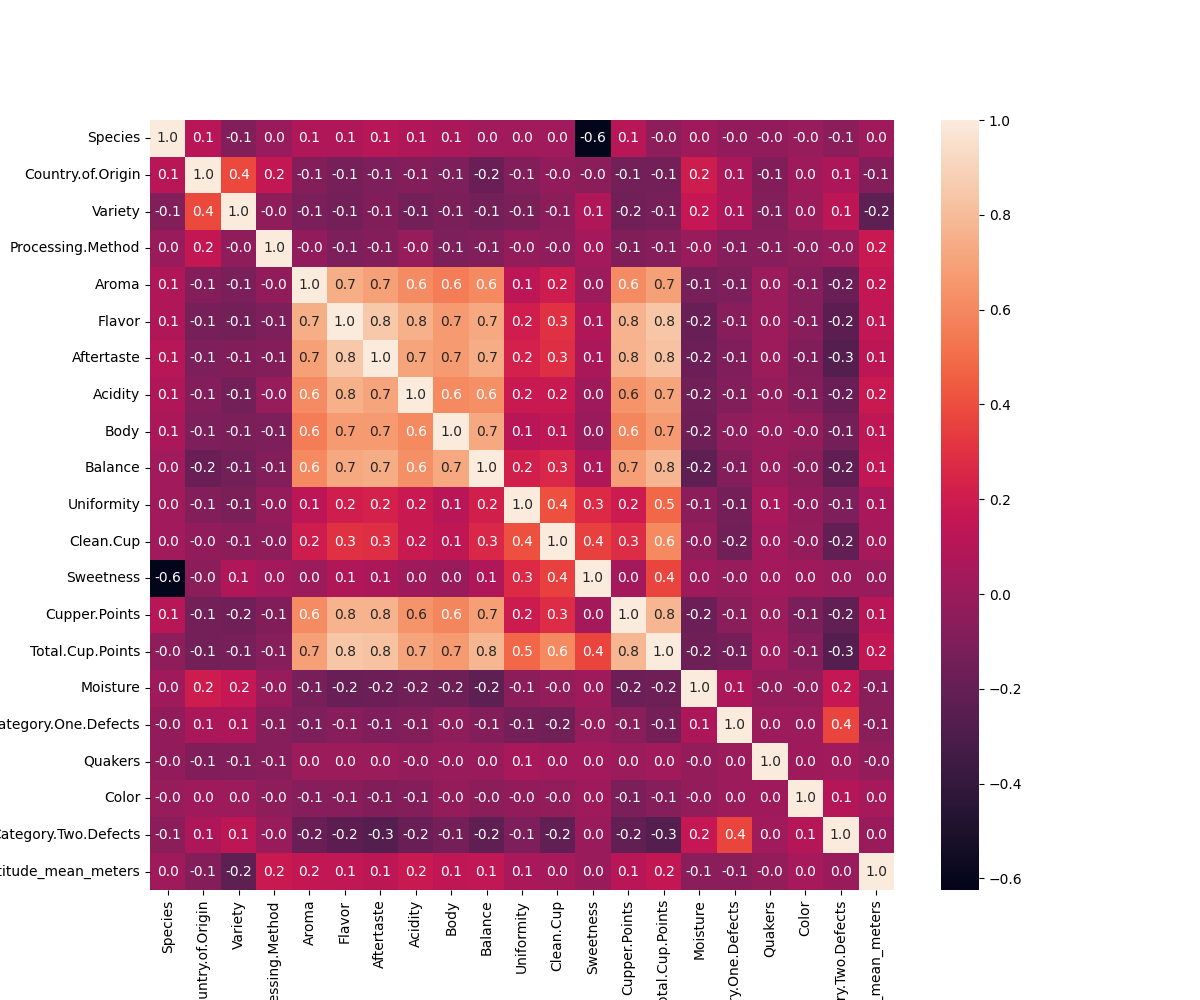

In [136]:
enc_corr_mat = enc_df.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(enc_corr_mat, annot = True, fmt = ".1f")

The species of the coffee seems to have a significant impact on the sweetness

<Axes: xlabel='Species'>

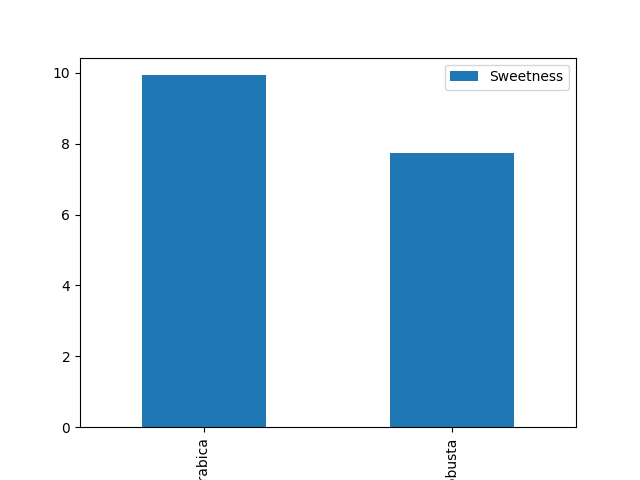

In [137]:
# Sweetnes grouped by species
df.groupby('Species')['Sweetness'].mean().reset_index().plot.bar(x='Species')

<Axes: xlabel='Country.of.Origin'>

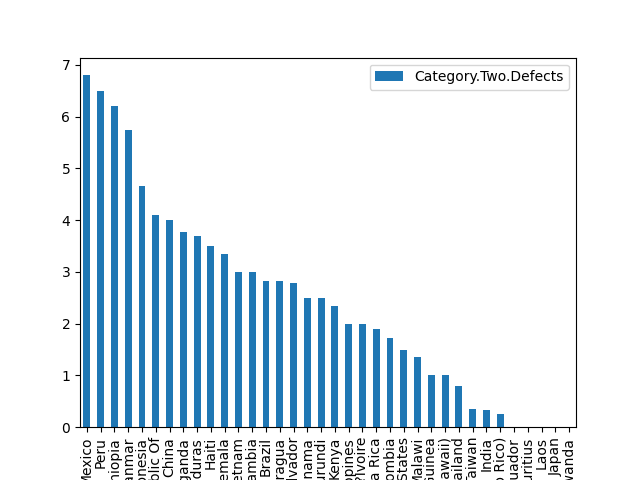

In [138]:
df.groupby('Country.of.Origin')['Category.Two.Defects'].mean().reset_index().sort_values(by='Category.Two.Defects', ascending=False).plot.bar(x='Country.of.Origin')

<Axes: xlabel='Country.of.Origin'>

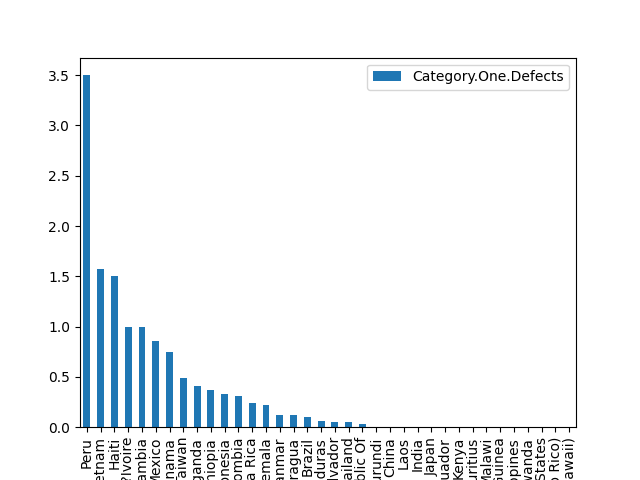

In [139]:
df.groupby('Country.of.Origin')['Category.One.Defects'].mean().reset_index().sort_values(by='Category.One.Defects', ascending=False).plot.bar(x='Country.of.Origin')



Interestingly though, we also find Ethiopia among the countries with the highest mean in Category 2 defect parameters, even though it is the country with the averagely highest scoring coffee.
This indicates that it takes rather large amounts of defects in the coffee to really make an impact on the overall score.

## Clustering model training

We'll try to extract more information with clustering models. For this purpose we drop our previous target feature "Total Cup Points" and scale the feature values in the dataset, so we can do a principal component analysis

In [140]:
# df_cls = enc_df.drop('Total Cup Points', axis=1)
df_cls = enc_df.copy()

In [141]:
df_cls[df_cls.columns] = sk.preprocessing.StandardScaler().fit_transform(df_cls)

In [142]:
df_cls.sample(5)

,Species,Country.of.Origin,Variety,Processing.Method,Aroma,Flavor,Aftertaste,Acidity,Body,Balance,Uniformity,Clean.Cup,Sweetness,Cupper.Points,Total.Cup.Points,Moisture,Category.One.Defects,Quakers,Color,Category.Two.Defects,altitude_mean_meters
239,-0.152286,1.443464,1.635319,-2.102535,0.296504,0.429382,0.525150,0.141387,0.540363,0.896779,0.287077,0.197142,0.22401,0.614175,0.595068,-0.049365,-0.199198,-0.18991,0.378071,-0.670475,-1.186903
326,-0.152286,1.548210,0.282078,-0.131073,0.555370,0.157575,0.789925,0.141387,0.229306,0.190286,0.287077,0.197142,0.22401,0.203037,0.435278,0.511973,-0.199198,-0.18991,0.378071,0.468730,0.766196
887,-0.152286,-0.441966,-0.620082,0.526081,-0.803674,-0.839050,-0.945825,-1.168307,-0.911237,-0.968363,0.287077,0.197142,0.22401,-0.595055,-0.641401,-0.610703,-0.199198,-0.18991,0.378071,0.088995,0.355017
547,-0.152286,0.605495,1.635319,-0.131073,1.105459,-0.084031,-0.210337,0.141387,-0.911237,-0.261870,0.287077,0.197142,0.22401,0.009560,0.119503,-0.049365,-0.199198,-0.18991,0.378071,-0.290740,0.663401
159,-0.152286,1.548210,0.282078,0.526081,0.814236,0.429382,1.025281,0.939980,0.540363,0.444623,0.287077,0.197142,0.22401,0.807651,0.785294,0.511973,-0.199198,-0.18991,0.378071,0.658598,0.601725


In [143]:
pca = PCA()
pca.fit(df_cls)
explained_variance = pca.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance)
# 3 principal components
cumulative_variance[2]

np.float64(0.4725891234734746)

/tmp/ipykernel_2638/3103998374.py:7: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


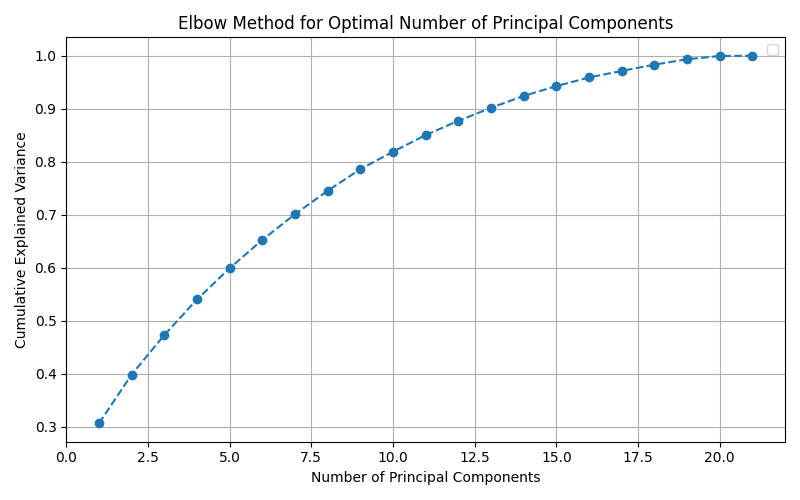

In [144]:
plt.figure(figsize=(8, 5))
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o', linestyle='--')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Elbow Method for Optimal Number of Principal Components')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

Not as much as we hoped for. For 3 principal components, we get just above 50% explained variance, which is not a lot. Lets try and extract high correlating features and do the PCA again

In [145]:
df_cls_ext = enc_df[["Aroma","Flavor","Acidity","Body","Balance","Aftertaste","Uniformity", "Sweetness"]].copy()
df_cls_ext[df_cls_ext.columns] = sk.preprocessing.StandardScaler().fit_transform(df_cls_ext)

In [146]:
pca = PCA()
pca.fit(df_cls_ext)
explained_variance = pca.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance)
# 3 principal components
cumulative_variance[2]

np.float64(0.8053004618615184)

/tmp/ipykernel_2638/3103998374.py:7: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


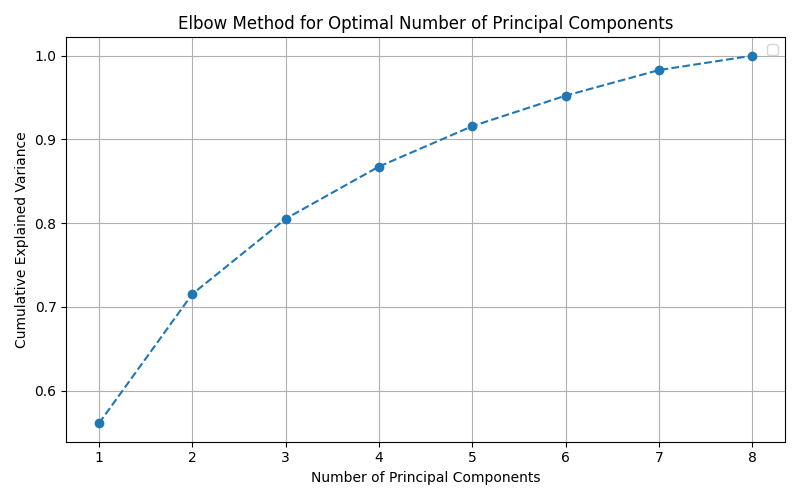

In [147]:
plt.figure(figsize=(8, 5))
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o', linestyle='--')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Elbow Method for Optimal Number of Principal Components')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

Now we have an explained variance of above 70% with 2 principal components. Much better!

In [148]:
pca_2 = PCA(n_components=2)
pca_2_result = pca_2.fit_transform(df_cls_ext)
dataset_pca = pd.DataFrame(abs(pca_2.components_), columns=df_cls_ext.columns, index=['PC_1', 'PC_2'])
dataset_pca

,Aroma,Flavor,Acidity,Body,Balance,Aftertaste,Uniformity,Sweetness
PC_1,0.381225,0.436044,0.392771,0.381476,0.404040,0.428197,0.128396,0.040661
PC_2,0.103547,0.019839,0.057700,0.113975,0.009413,0.009358,0.659328,0.733263


Here is our principal components. We see that PC1 is weighted across all the features, with a dive in Uniformity and Sweetness, while PC2 is mostly weighted be these.

In [149]:
df_pca = pd.DataFrame(pca_2_result, columns=['PC_1', 'PC_2'])
df_pca.head()

,PC_1,PC_2
0,8.565309,-0.713374
1,7.920370,-0.663066
2,6.869235,-0.475166
3,6.696222,-0.467683
4,6.561643,-0.466118


<Axes: >

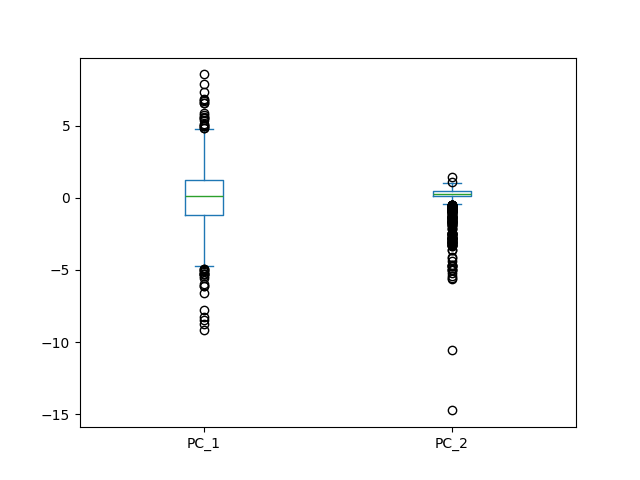

In [150]:
df_pca.plot.box()

We have also introduced some serious outliers. Lets remove them


In [151]:
z_scores = np.abs(zscore(df_pca))
df_pca = df_pca[(z_scores < 3).all(axis=1)]

<Axes: >

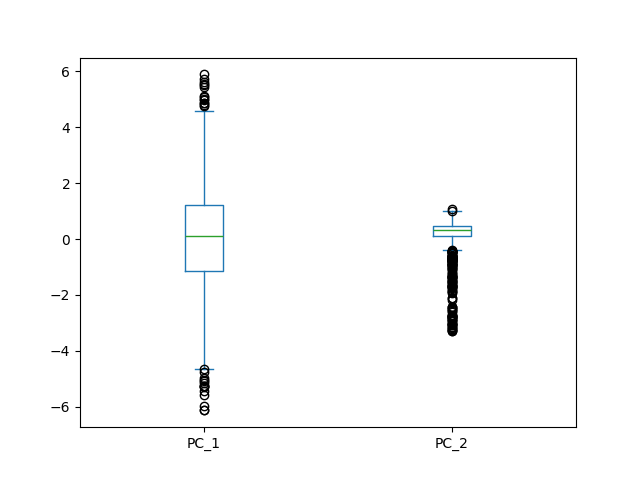

In [152]:
df_pca.plot.box()

/tmp/ipykernel_2638/519479020.py:2: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(df_pca['PC_1'], df_pca['PC_2'], s=50, cmap='viridis')
/tmp/ipykernel_2638/519479020.py:6: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


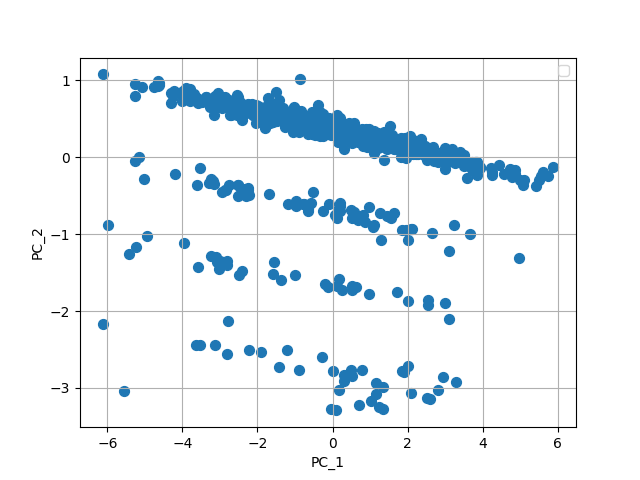

In [153]:
fig = plt.figure()
plt.scatter(df_pca['PC_1'], df_pca['PC_2'], s=50, cmap='viridis')
plt.xlabel('PC_1')
plt.ylabel('PC_2')
plt.grid(True)
plt.legend()
plt.show()

In [154]:
# Calculating optimal number of clusters in a K-means algorithm using silhouette score
scores = []
K = range(2,10)
for k in K:
    model = KMeans(n_clusters=k, n_init=10)
    model.fit(df_pca)
    score = sk.metrics.silhouette_score(df_pca, model.labels_, metric='euclidean', sample_size=len(df_pca))
    print("\nNumber of clusters =", k)
    print("Silhouette score =", score)
    scores.append([k, score])


Number of clusters = 2
Silhouette score = 0.4864683885974626

Number of clusters = 3
Silhouette score = 0.45968642227744283

Number of clusters = 4
Silhouette score = 0.4306487916313575

Number of clusters = 5
Silhouette score = 0.47649776806745087

Number of clusters = 6
Silhouette score = 0.4588818099987823

Number of clusters = 7
Silhouette score = 0.4673743714453953

Number of clusters = 8
Silhouette score = 0.4649703825393556

Number of clusters = 9
Silhouette score = 0.46806413106488093


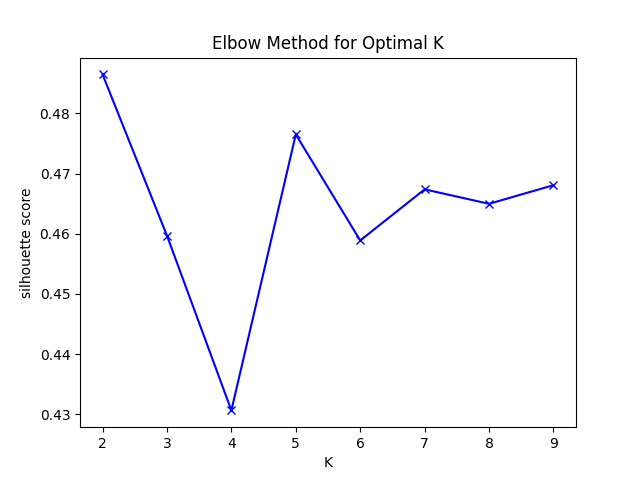

In [155]:
score_df = pd.DataFrame(scores, columns=['k', 'scores'])
fig = plt.figure()
plt.title('Elbow Method for Optimal K')
plt.plot(score_df.k, score_df.scores, 'bx-')
plt.xlabel('K')
plt.ylabel('silhouette score')
plt.show()

Using silhouette score for each amount of clusters, we se that we achieve a maximum score of 0,473 on 2 clusters. Let's try and visualize them

In [156]:
kmeans = KMeans(init='k-means++', n_clusters=2, n_init=10) 
prediction = kmeans.fit_predict(df_pca)

/tmp/ipykernel_2638/3703295130.py:6: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


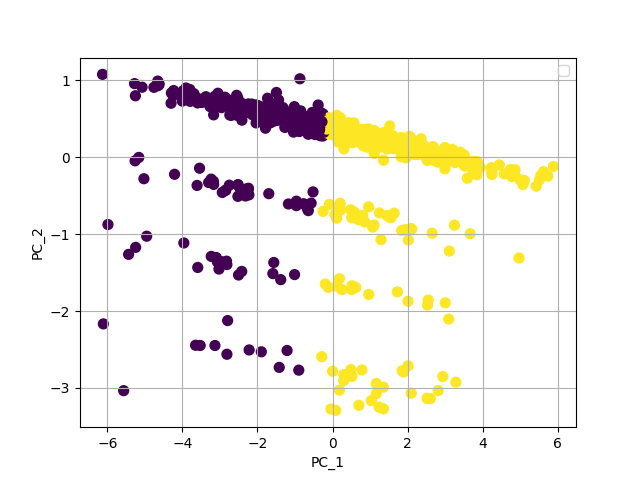

In [157]:
fig = plt.figure()
plt.scatter(df_pca['PC_1'], df_pca['PC_2'], c=prediction, s=50, cmap='viridis')
plt.xlabel('PC_1')
plt.ylabel('PC_2')
plt.grid(True)
plt.legend()
plt.show()

Well, its doesn't seem like the K-means algorithm finds any clusters that makes visual sense. Lets try to the PCA again with an additional PC. The extra dimension and 10% added explained variance, might give additional insights

In [158]:
pca_3 = PCA(n_components=3)
pca_3_result = pca_3.fit_transform(df_cls_ext)
dataset_pca = pd.DataFrame(abs(pca_3.components_), columns=df_cls_ext.columns, index=['PC_1', 'PC_2', 'PC_3'])
dataset_pca

,Aroma,Flavor,Acidity,Body,Balance,Aftertaste,Uniformity,Sweetness
PC_1,0.381225,0.436044,0.392771,0.381476,0.404040,0.428197,0.128396,0.040661
PC_2,0.103547,0.019839,0.057700,0.113975,0.009413,0.009358,0.659328,0.733263
PC_3,0.049970,0.040739,0.022757,0.067166,0.034935,0.002558,0.731547,0.674112


Here are our components. With PC1 weighted across most parameters, PC2 mostly weighted by Sweetness and Uniformity and PC3 weighted mainly by Uniformity

In [159]:
df_pca = pd.DataFrame(pca_3_result, columns=['PC_1', 'PC_2', 'PC_3'])
df_pca.head()

,PC_1,PC_2,PC_3
0,8.565309,-0.713374,-0.498447
1,7.920370,-0.663066,-0.486764
2,6.869235,-0.475166,-0.403830
3,6.696222,-0.467683,-0.395929
4,6.561643,-0.466118,-0.383813


<Axes: >

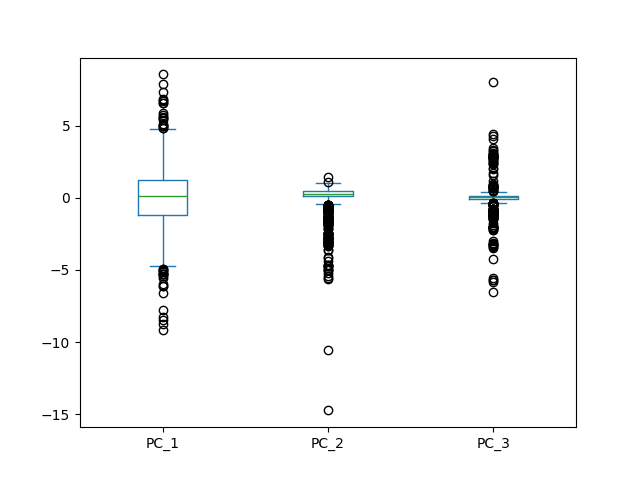

In [160]:
df_pca.plot.box()

In [161]:
z_scores = np.abs(zscore(df_pca))
df_pca = df_pca[(z_scores < 3).all(axis=1)]

<Axes: >

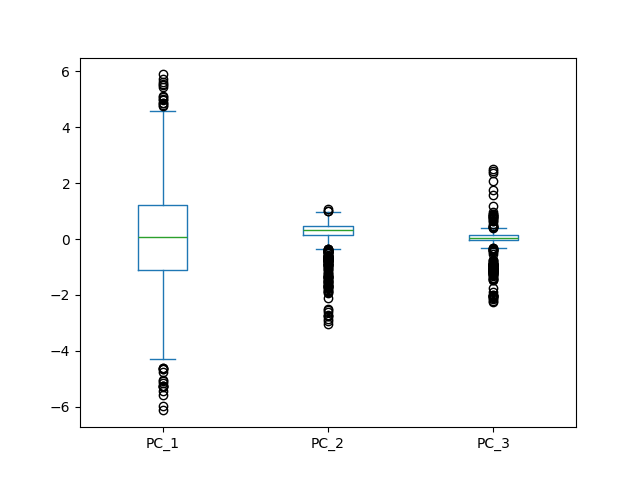

In [162]:
df_pca.plot.box()

Text(0.5, 0, 'PC 3')

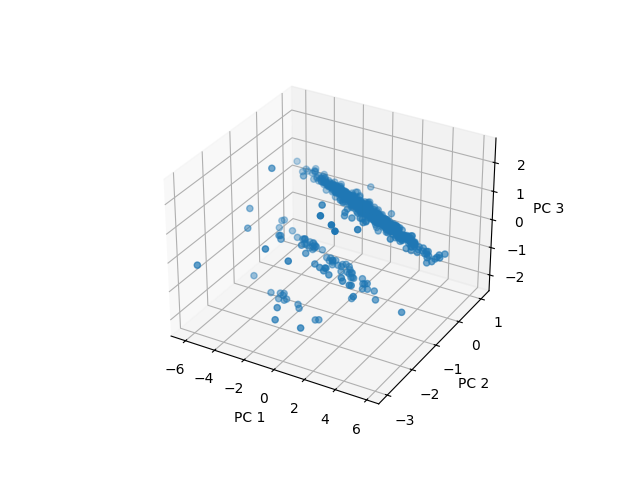

In [163]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.scatter(df_pca['PC_1'], df_pca['PC_2'], df_pca['PC_3'])

ax.set_xlabel('PC 1')
ax.set_ylabel('PC 2')
ax.set_zlabel('PC 3')

Here is our 3D points.
Let's start with doing doing a K-means clustering algorithm. First we need to find the optimal K (Number of clusters)

In [164]:
# Calculating optimal number of clusters in a K-means algorithm using silhouette score
scores = []
K = range(2,10)
for k in K:
    model = KMeans(n_clusters=k, n_init=10)
    model.fit(df_pca)
    score = sk.metrics.silhouette_score(df_pca, model.labels_, metric='euclidean', sample_size=len(df_pca))
    print("\nNumber of clusters =", k)
    print("Silhouette score =", score)
    scores.append([k, score])


Number of clusters = 2
Silhouette score = 0.4898576695192006

Number of clusters = 3
Silhouette score = 0.4645804564710879

Number of clusters = 4
Silhouette score = 0.4430582641319094

Number of clusters = 5
Silhouette score = 0.4235502939312917

Number of clusters = 6
Silhouette score = 0.4429131498741056

Number of clusters = 7
Silhouette score = 0.4669635315340985

Number of clusters = 8
Silhouette score = 0.47164334262945723

Number of clusters = 9
Silhouette score = 0.46371567304996203


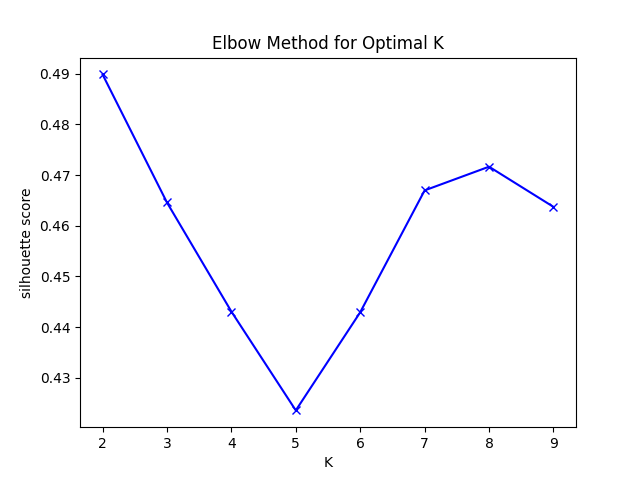

In [165]:
score_df = pd.DataFrame(scores, columns=['k', 'scores'])
fig = plt.figure()
plt.title('Elbow Method for Optimal K')
plt.plot(score_df.k, score_df.scores, 'bx-')
plt.xlabel('K')
plt.ylabel('silhouette score')
plt.show()

In [166]:
kmeans = KMeans(init='k-means++', n_clusters=2, n_init=10) 
prediction = kmeans.fit_predict(df_pca)

In [167]:
prediction

array([1, 1, 1, ..., 1, 1, 1], shape=(1042,), dtype=int32)

Text(0.5, 0, 'PC 3')

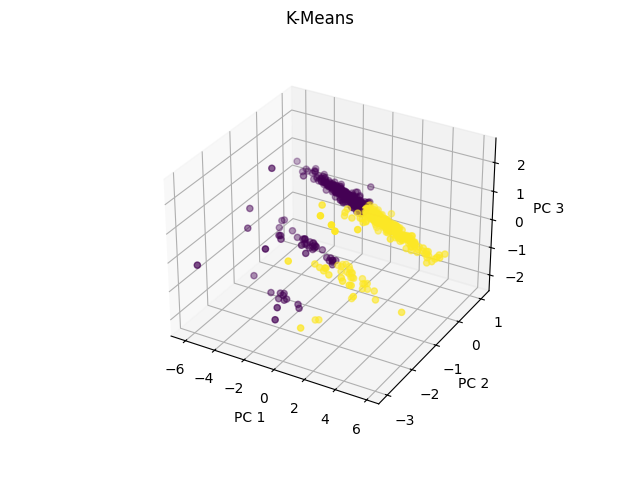

In [168]:
fig = plt.figure()
fig.suptitle("K-Means")
ax = fig.add_subplot(projection='3d')
ax.scatter(df_pca['PC_1'], df_pca['PC_2'], df_pca['PC_3'], c=prediction)

ax.set_xlabel('PC 1')
ax.set_ylabel('PC 2')
ax.set_zlabel('PC 3')

Well, the K-means method doesn't seem to agree with us. Lets try doing agglomerative clustering instead

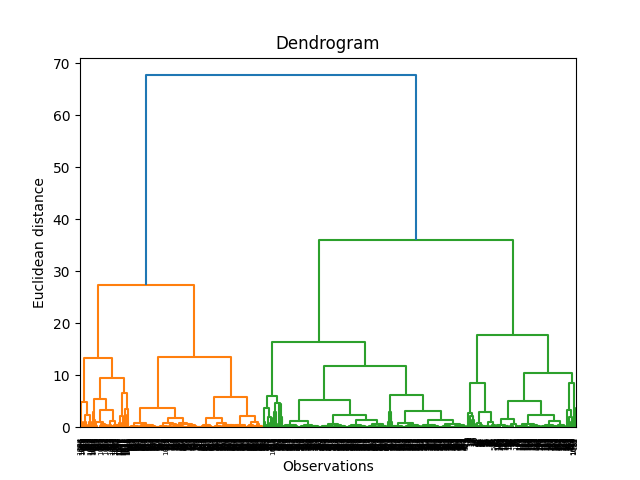

In [169]:
# Dendogram for agglomerative clustering
plt.figure()
dendogram = ch.dendrogram(ch.linkage(df_pca, method = 'ward'))
plt.title('Dendrogram')
plt.xlabel('Observations')
plt.ylabel('Euclidean distance')
plt.show()

In [170]:
model = AgglomerativeClustering(2, linkage = 'ward')
aggmodel_pred = model.fit_predict(df_pca)

Text(0.5, 0, 'PC 3')

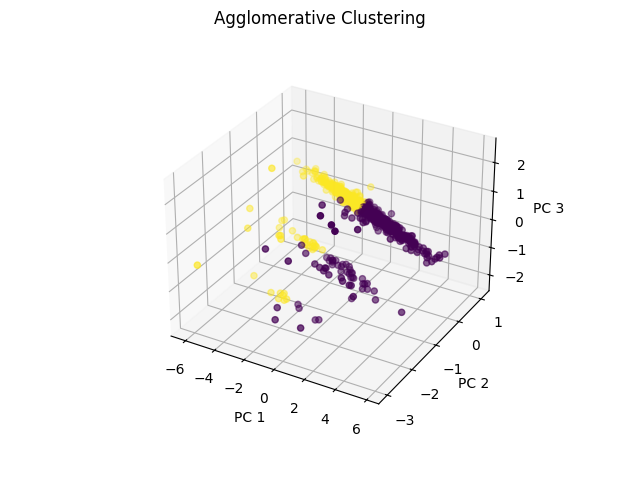

In [171]:
fig = plt.figure()
fig.suptitle("Agglomerative Clustering")
ax = fig.add_subplot(projection='3d')
ax.scatter(df_pca['PC_1'], df_pca['PC_2'], df_pca['PC_3'], c=aggmodel_pred)

ax.set_xlabel('PC 1')
ax.set_ylabel('PC 2')
ax.set_zlabel('PC 3')

Well that doesn't seem to agree either. Lets try running a DBSCAN

In [172]:
#DBSCAN for automatically determining amount of clusters
# Tried to play a little around with eps here
dbscan = DBSCAN(eps=0.7, min_samples=10)
dbscan_pred = dbscan.fit_predict(df_pca)
dbscan_pred

array([ 0,  0,  0, ..., -1, -1, -1], shape=(1042,))

Text(0.5, 0, 'PC 3')

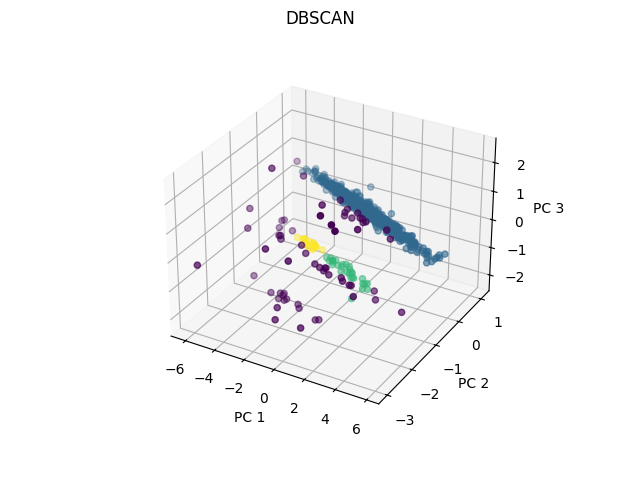

In [173]:
%matplotlib ipympl
fig = plt.figure()
fig.suptitle("DBSCAN")
ax = fig.add_subplot(projection='3d')
ax.scatter(df_pca['PC_1'], df_pca['PC_2'], df_pca['PC_3'], c=dbscan_pred)

ax.set_xlabel('PC 1')
ax.set_ylabel('PC 2')
ax.set_zlabel('PC 3')

The DBSCAN clustering seems to yield the best results so far. There's a clear large cluster, showing the correlation between PC1 and PC2. Two smaller clusters showing a concentration of data points in the same correlation between PC1 and PC2, but is offset on PC2 and PC3. Showing 2 potential subcategories of data along both axises of PC2 and PC3.

In this case we suspect the clusters mostly represent the bean species, since both PC2 and PC3 are mainly weighted by Unifomity and Sweetness. We found in earlier analysis, that the main difference between Arabica and Robusta beans seem to be in sweetness. This fits with a cluster split along PC2 and PC3 axises, along with the much smaller cluster size in terms of data points, since Robusta beans are less represented in the dataset.